In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader

from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification

In [ ]:
x, y= make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [ ]:
import sklearn
sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=False, return_norm=True)

(array([[ 0.19917683, -0.17148737,  0.06925171, ..., -0.31970457,
         -0.10489594, -0.11638156],
        [-0.13433095, -0.19888778,  0.02192397, ..., -0.32386368,
          0.04326174,  0.25634003],
        [ 0.32558422, -0.02151571, -0.17981467, ..., -0.17165523,
         -0.16128725, -0.01318716],
        ...,
        [-0.19088235, -0.15969476,  0.00573845, ..., -0.38586713,
          0.11713307,  0.20015308],
        [ 0.09071051, -0.28505176, -0.18457006, ..., -0.23432957,
         -0.01671511,  0.13510785],
        [-0.01180974, -0.08286806,  0.12491022, ..., -0.39947408,
         -0.10514837,  0.61021706]]),
 array([ 5.88088161, 12.92235011, 13.6291254 , ..., 11.64712499,
        11.76959011,  8.57476829]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, X_test, Y, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
X.shape, Y.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [ ]:
X.shape

(37500, 15)

In [ ]:
w=np.random.randn(1,15)

In [ ]:
w=w[0]
b=0

In [ ]:
r=0.01
loss=0
for i in range(len(X)):
    loss+=(Y[i]-(np.dot(w,X[i])+b))**2
print(loss/len(X))


1.8154191169425407


In [ ]:
mse=[]
for i in range(10):
    b_g=0
    m=[0]*15
    for j in range(len(X)):
        b_g+=(-2/len(X))*(Y[j]-(np.dot(w,X[j])+b))
        for p in range(15):
            m[p]+=(-2/len(X))*(Y[j]-(np.dot(w,X[j])+b))*X[j][p]
    b=b-b_g*0.01
    for q in range(15):
        w[q]-=m[q]*0.01
    loss=0
    for m in range(len(X)):
        loss+=(Y[m]-(np.dot(X[m],w)+b))**2
    mse.append(loss/len(X))

In [ ]:
loss=0
for i in range(len(X)):
    loss+=(Y[i]-(np.dot(X[i],w)+b))**2
print(loss/len(X))

1.6009818827161815


In [ ]:
plt.plot(range(1000),mse)
plt.xlabel('iterations')
plt.ylabel('mean squared_error')
plt.show

In [ ]:
l=[]
for i in range(len(X)):
    #print('actual_value:{} :predicted_value:{}'.format(Y[i],(np.dot(X[i],w))+b))
    l.append([Y[i],np.dot(X[i],w)+b])

In [ ]:
df=pd.DataFrame(l,columns=['actual','predicted'])
df

,actual,predicted
0,0,-1.095499
1,0,-1.255179
2,0,-1.665058
3,1,0.563463
4,0,0.686348
...,...,...
37495,0,-0.803866
37496,0,-1.069808
37497,1,-0.267738
37498,0,-1.230016


In [ ]:
predicted=[]
for i in range(len(X)):
    predicted.append(np.dot(X[i],w)+b)

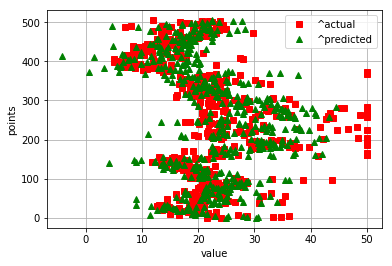

In [ ]:
plt.plot(Y,range(506),'rs',label='^actual')
plt.plot(predicted,range(506),'g^',label='^predicted')
plt.ylabel('points')
plt.xlabel('value')
plt.grid()
plt.legend()


In [ ]:
clf = SGDRegressor()
clf.fit(X, Y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
print(mean_squared_error(Y,clf.predict(X)))

0.12887947093914473


In [ ]:
k=clf.predict(X)

In [ ]:
l=[]
for i in range(len(X)):
    l.append([Y[i],k[i]])

In [ ]:
df1=pd.DataFrame(l,columns=['actual','predicted'])
df1

,actual,predicted
0,0,0.133987
1,0,-0.400991
2,0,-0.016423
3,1,0.216528
4,0,0.269124
...,...,...
37495,0,0.025412
37496,0,0.145504
37497,1,1.013559
37498,0,0.143679


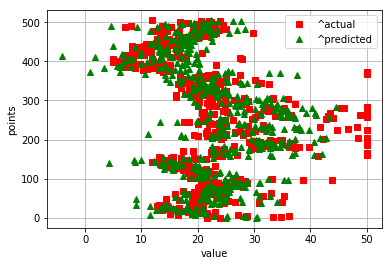

In [ ]:
plt.plot(Y,range(506),'rs',label='^actual')
plt.plot(clf.predict(X),range(506),'g^',label='^predicted')
plt.ylabel('points')
plt.xlabel('value')
plt.grid()
plt.legend()

In [ ]:
w1=clf.coef_

In [ ]:
l=[]
for i in range(13):
    l.append([w[i],w1[i]])

In [ ]:
df=pd.DataFrame(l,columns=['weights of actual implementation','weights of sgdregressor'])
df

,weights of actual implementation,weights of sgdregressor
0,-0.876210,-0.900982
1,0.996047,1.001871
2,-0.118030,-0.151602
3,0.716848,0.691633
4,-1.939348,-1.998964
5,2.735584,2.769887
6,-0.043350,-0.065345
7,-3.090592,-2.997300
8,2.030208,1.970073
9,-1.389225,-1.419642


In [ ]:
df=pd.DataFrame([[21.968159849683104,21.957684088851625]],columns=['mse of sgdregressor','mse of actual implementation'])
df

,mse of sgdregressor,mse of actual implementation
0,21.96816,21.957684


# Conclusion

1.mean squared error is very similar

2.weights are also approximately equal in both.

3.by actual implementation, it takes less no. of  itertions to converge.